In [1]:
!pip install git+https://github.com/JaidedAI/EasyOCR.git

  Cloning https://github.com/JaidedAI/EasyOCR.git to c:\users\itsc\appdata\local\temp\pip-req-build-1i38idv9
  Resolved https://github.com/JaidedAI/EasyOCR.git to commit c999505ef6b43be1c4ee36aa04ad979175178352
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/JaidedAI/EasyOCR.git 'C:\Users\ITSC\AppData\Local\Temp\pip-req-build-1i38idv9'


In [2]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
import easyocr
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

In [4]:
reader = easyocr.Reader(["ko", "en"])

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |--------------------------------------------------| 1.7% Complete

Progress: |███-----------------------------------------------| 7.7% Complete

Progress: |███████-------------------------------------------| 14.1% Complete

Progress: |█████████-----------------------------------------| 18.5% Complete

Progress: |███████████---------------------------------------| 23.7% Complete

Progress: |███████████████-----------------------------------| 30.2% Complete

Progress: |██████████████████--------------------------------| 36.7% Complete

Progress: |█████████████████████-----------------------------| 43.2% Complete

Progress: |████████████████████████--------------------------| 49.5% Complete

Progress: |████████████████████████████----------------------| 56.3% Complete

Progress: |███████████████████████████████-------------------| 63.1% Complete

Progress: |██████████████████████████████████----------------| 69.9% Complete

Progress: |██████████████████████████████████████------------| 76.6% Complete

Progress: |█████████████████████████████████████████---------| 83.4% Complete

Progress: |████████████████████████████████████████████------| 89.9% Complete

Progress: |████████████████████████████████████████████████--| 96.6% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |█████---------------------------------------------| 11.0% Complete

Progress: |███████████████████████---------------------------| 47.0% Complete

Progress: |██████████████████████████████████████████--------| 84.8% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [6]:
result = reader.readtext('./image/dobby.jpg')

In [9]:
result

[([[98, 403], [508, 403], [508, 483], [98, 483]],
  'Dobby is ffiree!',
  0.49031699689570846),
 ([[78, 474], [534, 474], [534, 548], [78, 548]],
  '도비는 자율예요',
  0.8375594777233835)]

In [18]:
img = cv2.imread("./image/dobby.jpg")
img = cv2.imread('./image/dobby.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [19]:
img = Image.fromarray(img)
font = ImageFont.truetype("fonts/HMKMRHD.TTF", 20)
draw = ImageDraw.Draw(img)

In [20]:
COLORS =  np.random.randint(0, 255, size = (255, 3), dtype = "uint8")

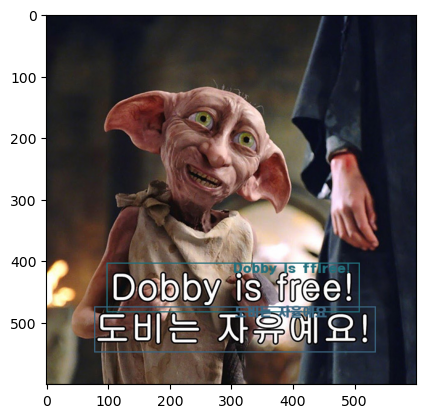

In [21]:
for i in result:
    x = i[0][0][0]
    y = i[0][0][1]
    w = i[0][1][0] - i[0][0][0]
    h = i[0][2][1] - i[0][1][1]
    
    color_idx = random.randint(0, 255)
    color = [int(c) for c in COLORS[color_idx]]
    
    draw.rectangle(((x, y), (x + w, y + h)), outline = tuple(color), width = 2)
    draw.text((int((x + x + w) / 2), y - 2), str(i[1]), font = font, fill = tuple(color),)
    
plt.imshow(img)
plt.show()